# Save a path dictionary for future use

In [7]:
from astropy.coordinates import SkyCoord
import sys
sys.path.append('..')
from multibandphotometry import MultiBandPhotometry
from astropy.coordinates import SkyCoord
import astropy.units as u

In [8]:
source_position = SkyCoord(150.15949, 2.1914772, frame='icrs', unit=u.deg)
z = 0.924
phot = MultiBandPhotometry(source_position, z,)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2016-06-04T00:47:19.488' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-05-03T03:37:16.477' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-06-29T23:52:46.677' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-05-03T03:02:47.823' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-04-30T03:11:04.794' from MJD-END'. [astropy.wcs.wcs]


In [9]:
# Save the dictionary to a text file
with open('/home/lupengjun/OII_emitter/data/data_path.txt', 'w+') as f:
    for key, value in phot.image_paths.items():
        f.write(f"{key},{value}\n")

# Generate psf_homo.py 

In [1]:
import numpy as np
#load path dictionary
dic_array = np.loadtxt('/home/lupengjun/OII_emitter/data/data_path.txt', delimiter=',', dtype=str)
path_dic = dict(dic_array)

In [2]:
from PSF_homo import PSF_homo

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-059 CANNOT BE CHECKED AGAINST ONLINE VERSION


Now at HST_F606W
Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/kernel_HST_F606W_to_F444W.fits


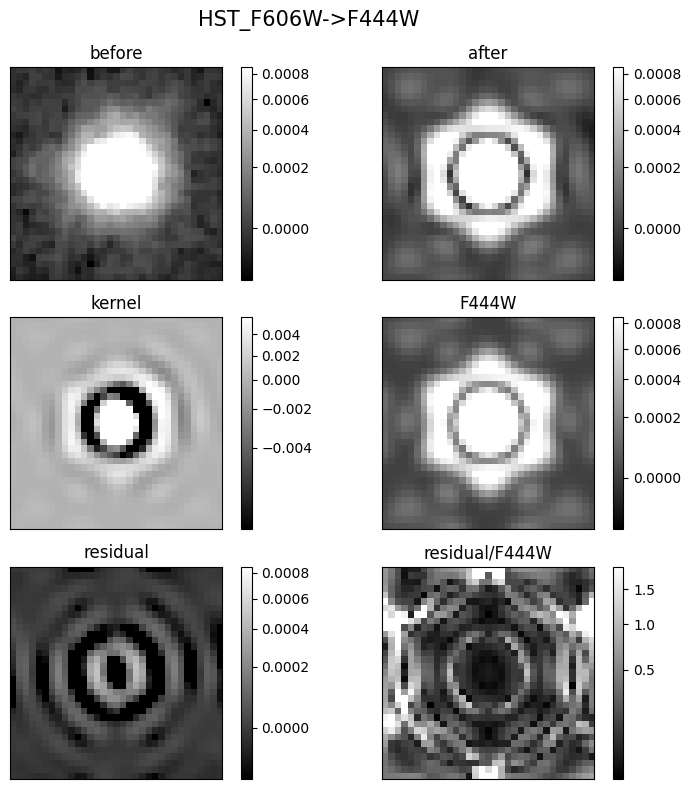

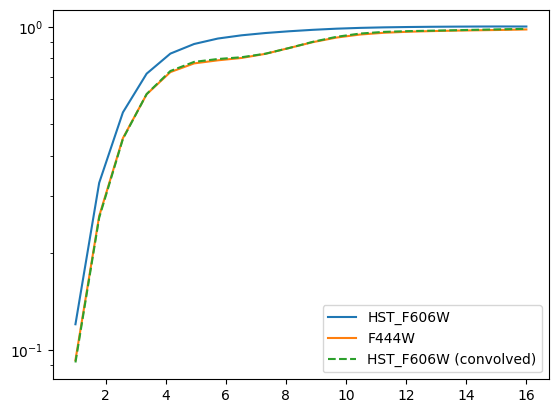

Now at HST_F814W
Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/kernel_HST_F814W_to_F444W.fits


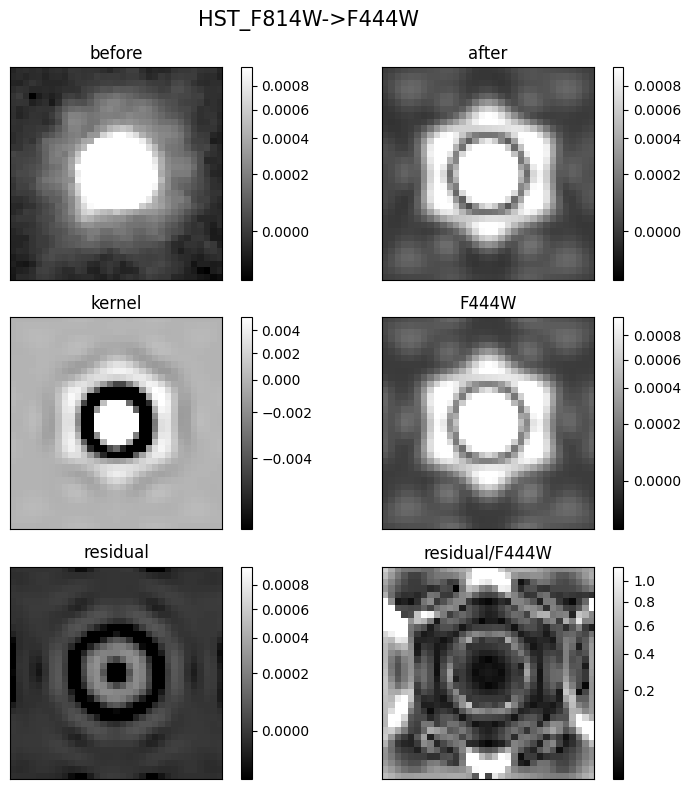

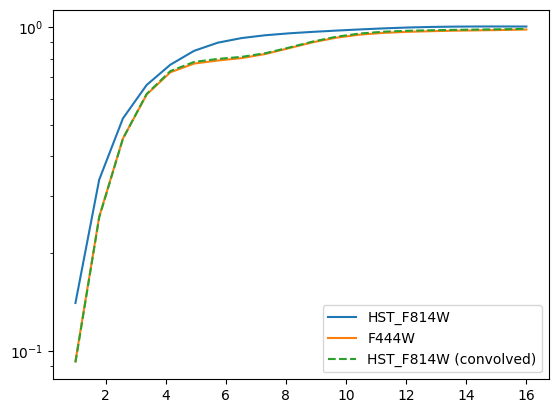

Now at HST_F125W


Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/kernel_HST_F125W_to_F444W.fits


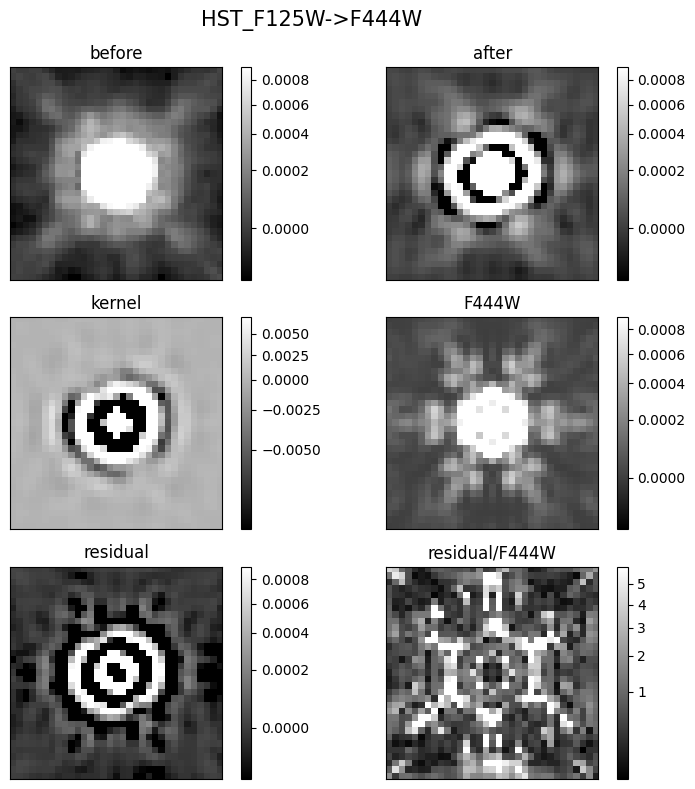

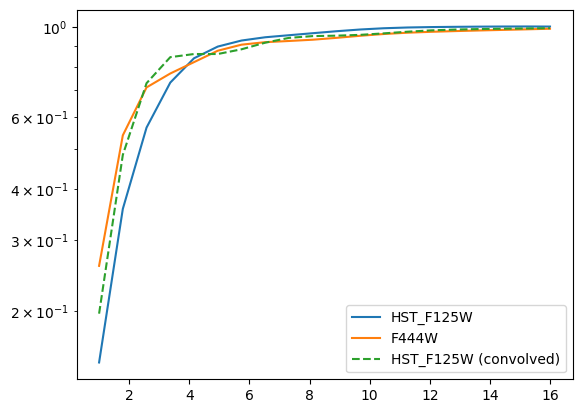

Now at HST_F160W


Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/kernel_HST_F160W_to_F444W.fits


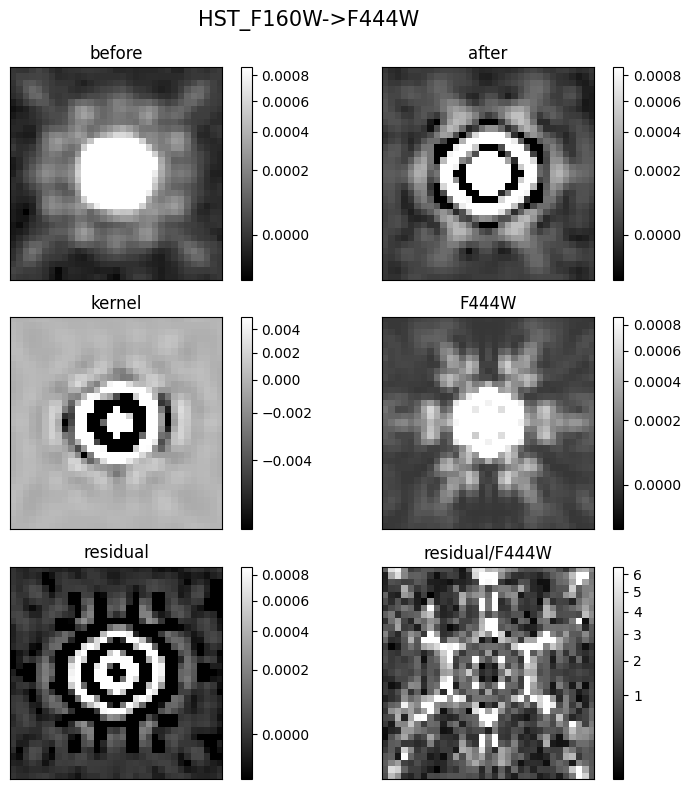

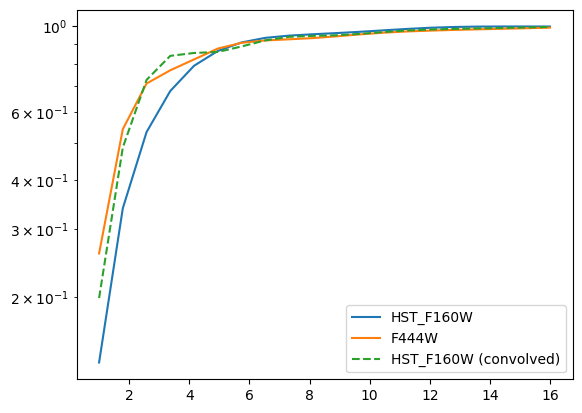

In [23]:
for img_band, img_path in path_dic.items():
    if 'HST' in img_band:
        print('Now at', img_band)
        psf_ = PSF_homo(img_path, 0, img_band, psf_type='F444W')
        psf_.build_self_psf(mode='Gaia')
        psf_.build_target_psf()
        psf_.kernel_gen()
        psf_.test_psfmatching()
        if input('Type 99 to continue, else stop') != '99':
            break

load images: ['/home/lupengjun/OII_emitter/data/image/COSMOS-archive/ultravista_sci/0001_150.15979000_2.19117000_UVISTA_NB118_19_11_18_allpaw_skysub_015_dr4_rc_v2.fits']
central coordinate in this field: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (150.15976973, 2.19115997)>
Gaia table exists. Skip query.
######## working on filter VISTA_NB118
central offset limit:  5  pixels
Index for this star:  0
original xy centroid: 26.130, 26.479
10x over-sampled centroid: 265.804, 269.382
10x over-sampled centroid, corrected: 164.162, 165.382
final centroid on native pixel scale: 15.919, 16.038
bkg mean: 0.000
Index for this star:  1
Cutout is empty
------------> Choose index: [0]


Target PSF already exists! Read the existed file.


pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/kernel_VISTA_NB118_to_Moffat.fits


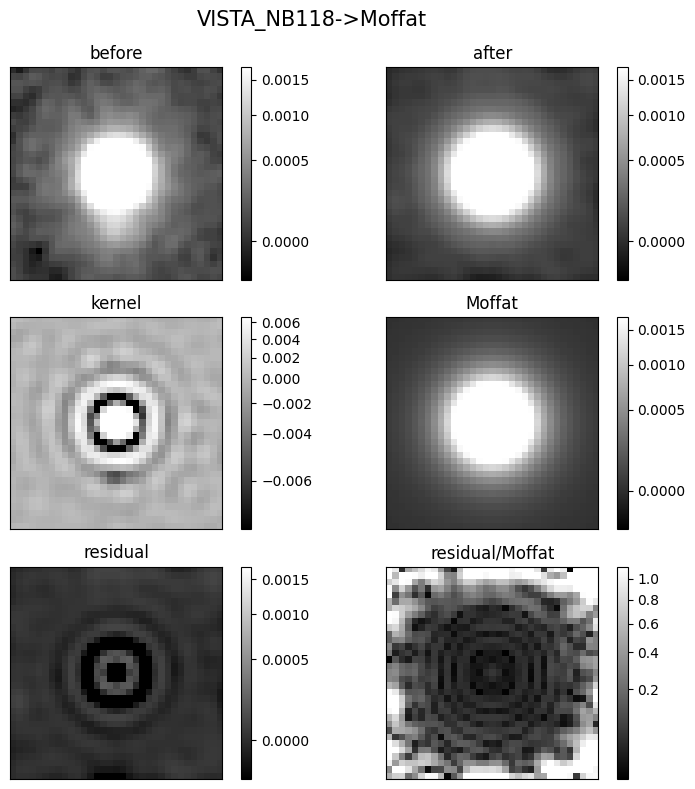

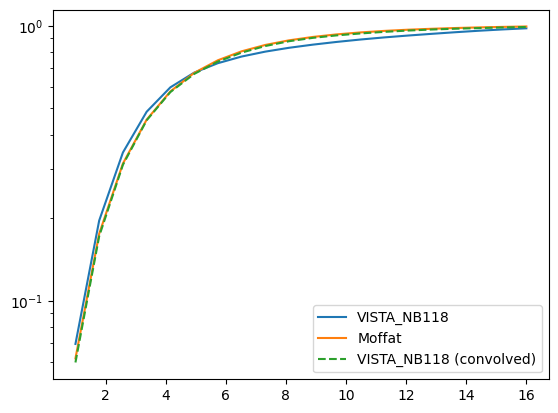

# Try to oversample HST PSF at 3X to get better convolution kernel

In [16]:
from scipy.ndimage import zoom

In [19]:
from PSF_homo import save_psf

Now at HST_F606W
Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/kernel_HST_F606W_to_F444W.fits


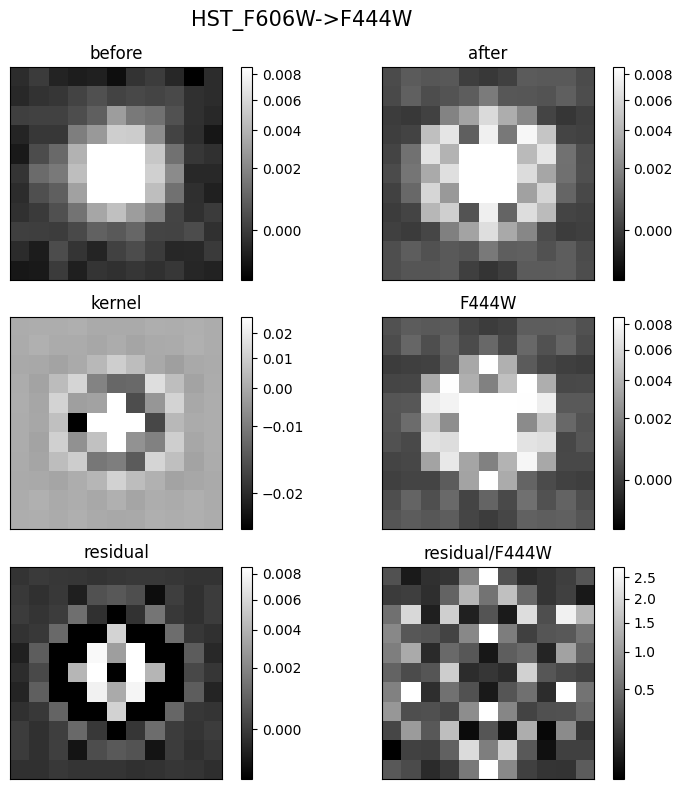

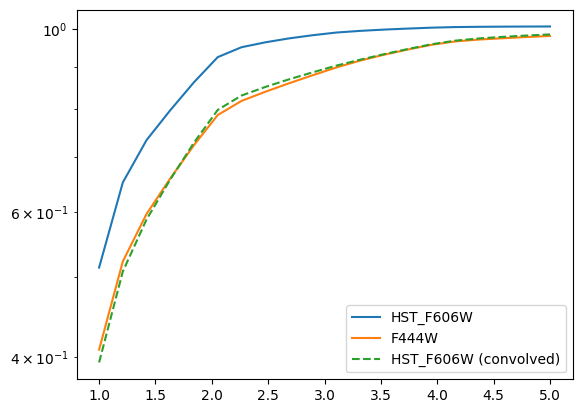

Now at HST_F814W
Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/kernel_HST_F814W_to_F444W.fits


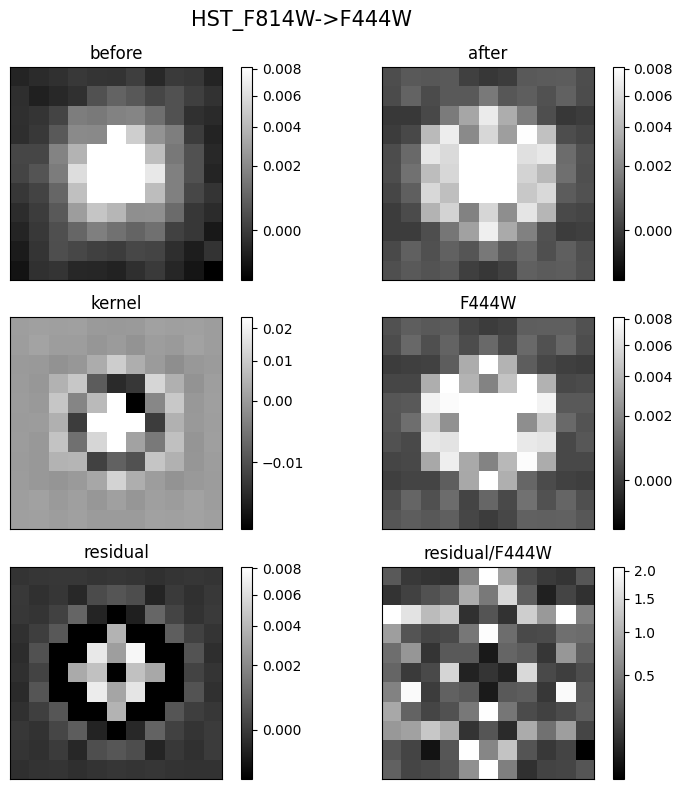

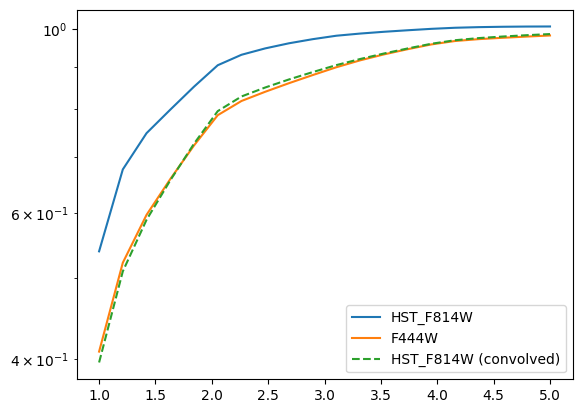

Now at HST_F125W


Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/kernel_HST_F125W_to_F444W.fits


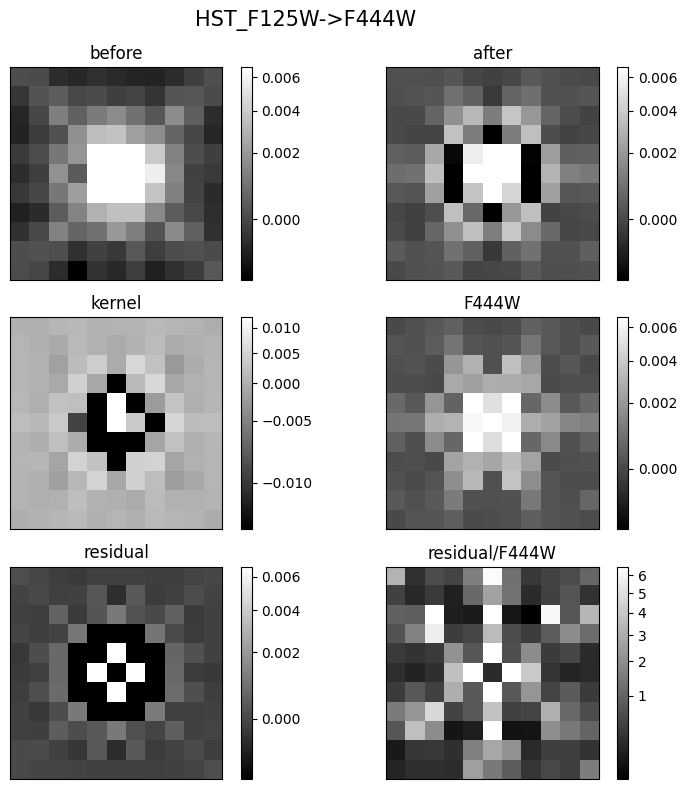

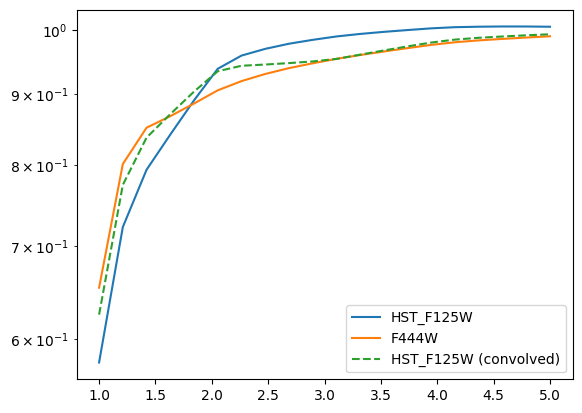

Now at HST_F160W


Target PSF already exists! Read the existed file.
pypher: Output kernel saved to /home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/kernel_HST_F160W_to_F444W.fits


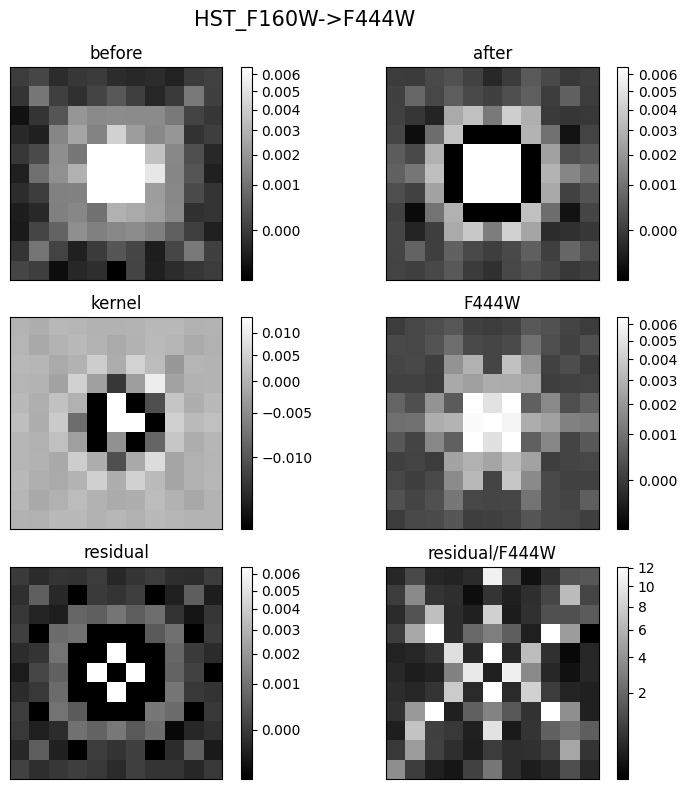

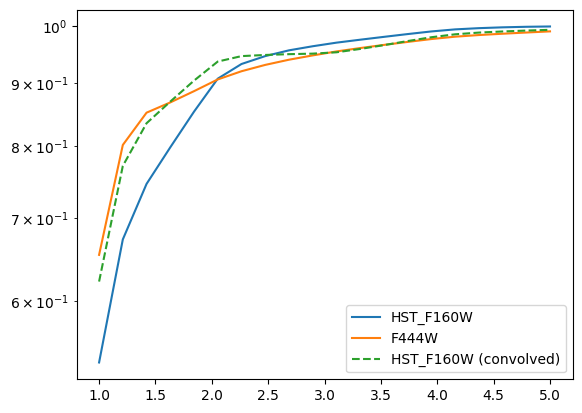

In [32]:
for img_band, img_path in path_dic.items():
    if 'HST' in img_band:
        print('Now at', img_band)
        filename_psf = '/home/lupengjun/OII_emitter/photometry/output/psf_for_pypher/'+f'{img_band}_Gaia_3Xpsf.fits'
        psf_ = PSF_homo(img_path, 0, img_band, psf_type='F444W')
        psf_.build_self_psf(mode='Gaia')
        psf_.psf = zoom(psf_.psf, 1./3)
        psf_.psf = psf_.psf/np.sum(psf_.psf)
        psf_.pixel_scale = psf_.pixel_scale*3
        psf_.pixel_size = psf_.pixel_size/3
        psf_.psf_path = filename_psf
        save_psf(psf_.psf, psf_.pixel_scale, psf_.psf_path)
        psf_.build_target_psf()
        psf_.kernel_gen(write_path='/home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/')
        psf_.test_psfmatching(write_path='/home/lupengjun/OII_emitter/photometry/output/test_conv_psf/HST_3X/')
        if input('Type 99 to continue, else stop') != '99':
            break

In [28]:
from astropy.visualization import ImageNormalize
from astropy.visualization import ZScaleInterval, LogStretch, SqrtStretch
from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt
from PSF_homo import remove_tick, radial_profile
from astropy.io import fits

def test_psfmatching(psf_src, psf_tar, kernel, write_path='/home/lupengjun/OII_emitter/photometry/output/test_conv_psf/HST_3X_Dsample/'):
    '''
    Plot check image and radial profile of original, convolved and target PSF. Adapted from Daming, Yang
    '''    
    psf_src_conv = convolve_fft(psf_src, kernel, normalize_kernel=True, allow_huge=True)

    #plot check image
    fig, ax = plt.subplots(3, 2, figsize=(8,8))
    ax_imshow = []
    norm = ImageNormalize(psf_src, stretch=SqrtStretch(), interval=ZScaleInterval())
    ax_imshow.append(ax[0][0].imshow(psf_src, norm=norm, cmap='gray'))
    ax[0][0].set_title('before')
    remove_tick(ax[0][0])

    ax_imshow.append(ax[0][1].imshow(psf_src_conv, norm=norm, cmap='gray'))
    ax[0][1].set_title('after')
    remove_tick(ax[0][1])

    norm_k = ImageNormalize(kernel, stretch=SqrtStretch(), interval=ZScaleInterval())
    ax_imshow.append(ax[1][0].imshow(kernel, norm=norm_k, cmap='gray'))
    ax[1][0].set_title('kernel')
    remove_tick(ax[1][0])

    ax_imshow.append(ax[1][1].imshow(psf_tar, norm=norm, cmap='gray'))
    ax[1][1].set_title(f'{psf_type}')
    remove_tick(ax[1][1])

    res = psf_src_conv-psf_tar
    ax_imshow.append(ax[2][0].imshow(res, norm=norm, cmap='gray'))
    ax[2][0].set_title('residual')
    remove_tick(ax[2][0])

    res = np.abs(psf_src_conv-psf_tar)/psf_tar
    norm_k = ImageNormalize(res, stretch=SqrtStretch(), interval=ZScaleInterval())
    ax_imshow.append(ax[2][1].imshow(res, norm=norm_k, cmap='gray'))
    ax[2][1].set_title(f'residual/{psf_type}')
    remove_tick(ax[2][1])

    ax_flat = ax.flatten()
    for _ax in ax_flat:
        remove_tick(_ax)
    for _ax in ax_imshow:
        fig.colorbar(_ax)
    title = f'{img_band}->{psf_type}'
    fig.suptitle(title, fontsize=15)
    fig.tight_layout()
    plt.savefig(write_path+f'img_{title}.png')
    plt.show()
    plt.clf()
    plt.close()

    #plot radial profile
    r, profile = radial_profile(psf_src, bins=20)
    plt.plot(r, profile, label=img_band)
    r, profile = radial_profile(psf_tar, bins=20)
    plt.plot(r, profile, label=psf_type)
    r, profile = radial_profile(psf_src_conv, bins=20)
    plt.plot(r, profile, label=f'{img_band} (convolved)', ls='--')
    plt.yscale('log')
    plt.legend()
    plt.savefig(write_path+f'radial_{title}.png')
    plt.show()
    plt.clf()
    plt.close()

In [35]:
print(kernel.sum())
kernel = zoom(kernel, 3)
print(kernel.sum())

1.0
9.358379553244712


Now at HST_F606W


Target PSF already exists! Read the existed file.


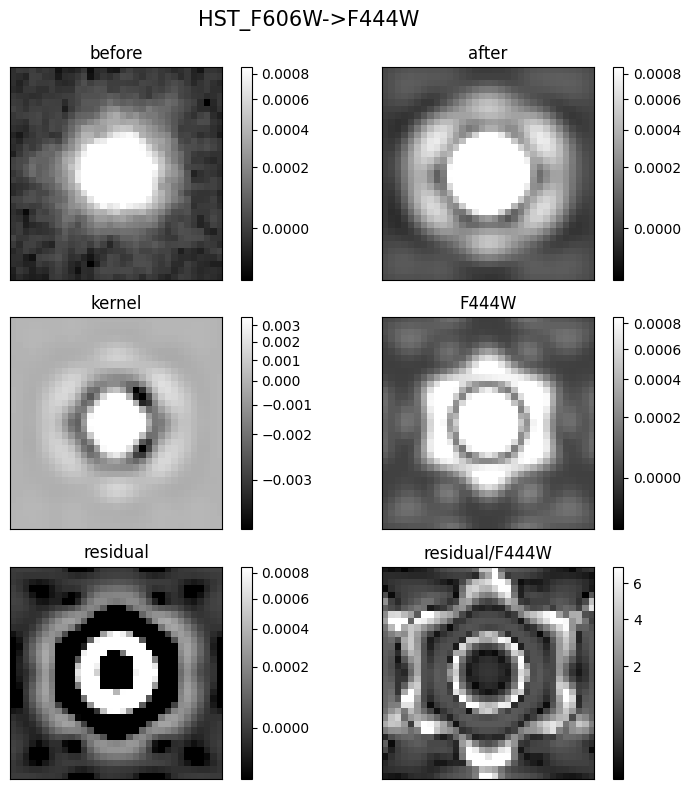

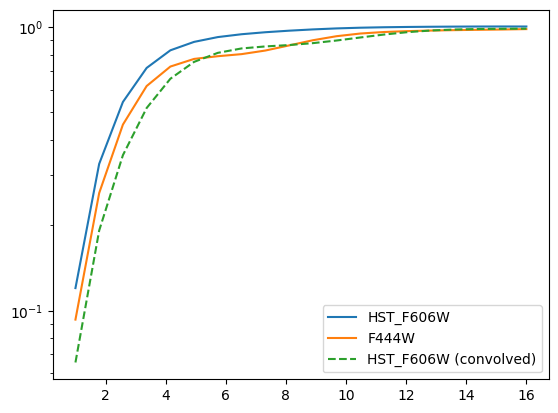

Now at HST_F814W
Target PSF already exists! Read the existed file.


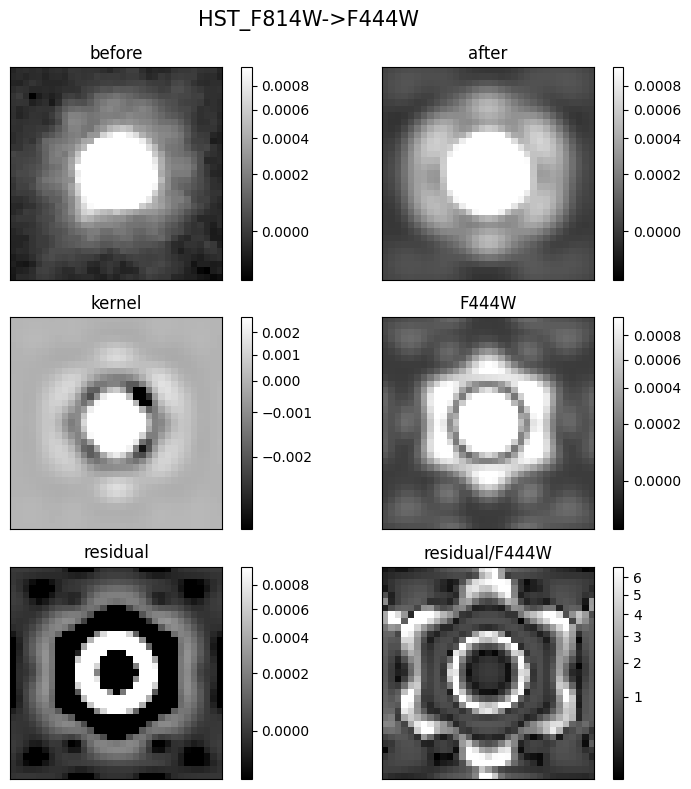

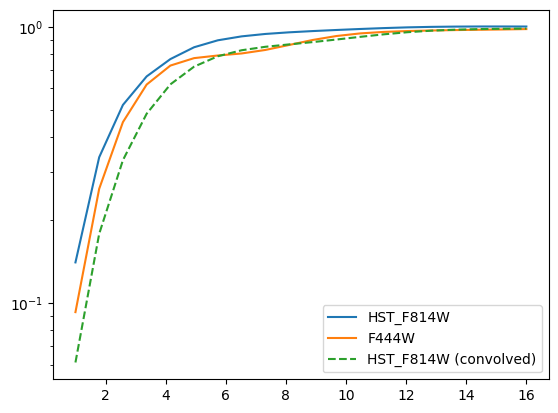

Now at HST_F125W


Target PSF already exists! Read the existed file.


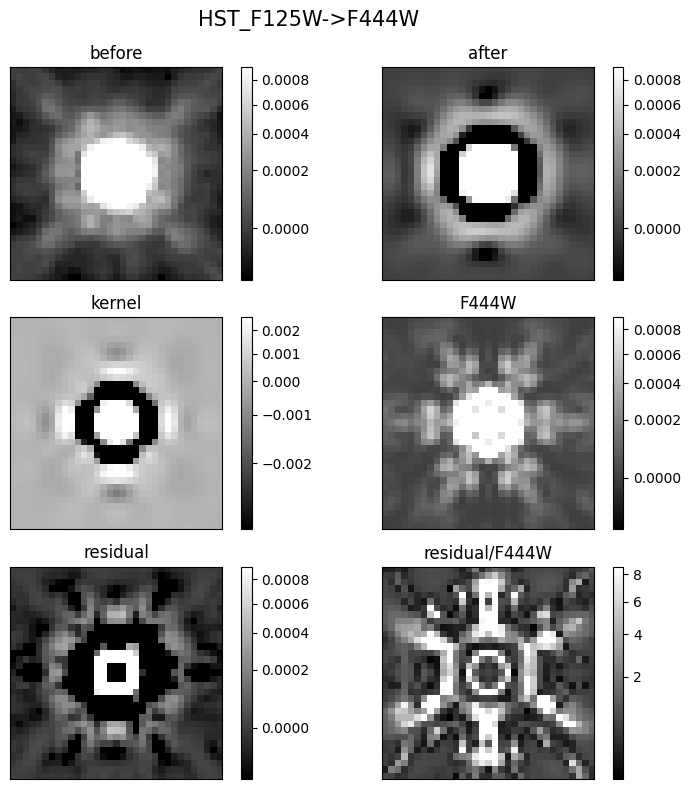

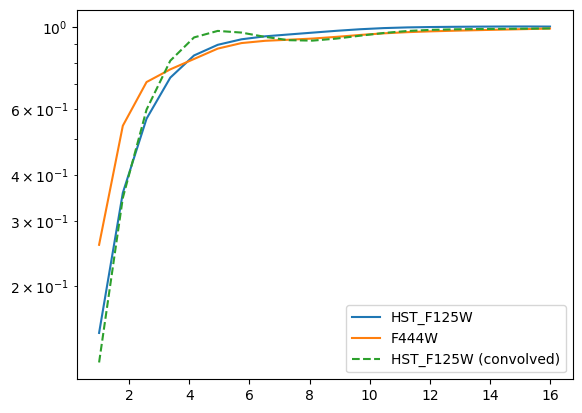

Now at HST_F160W


Target PSF already exists! Read the existed file.


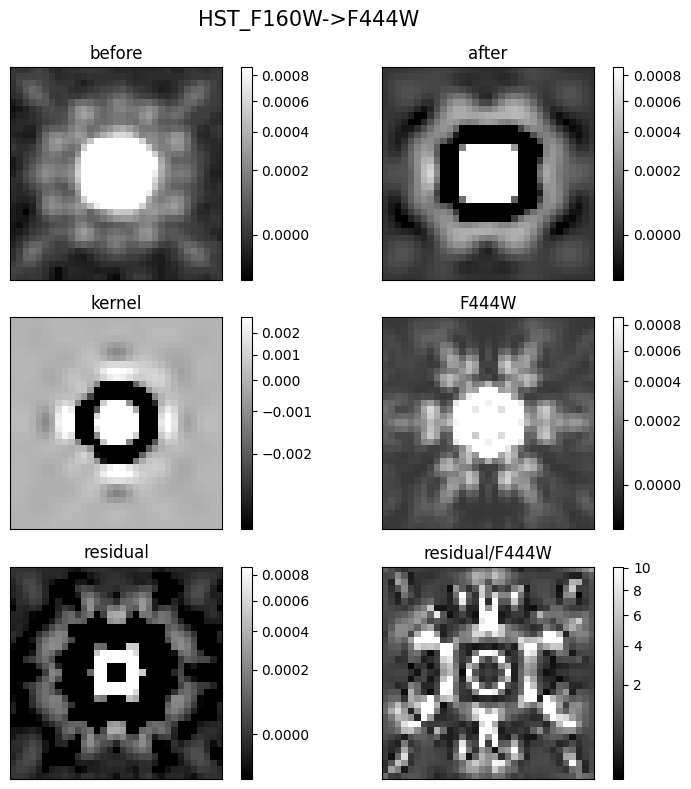

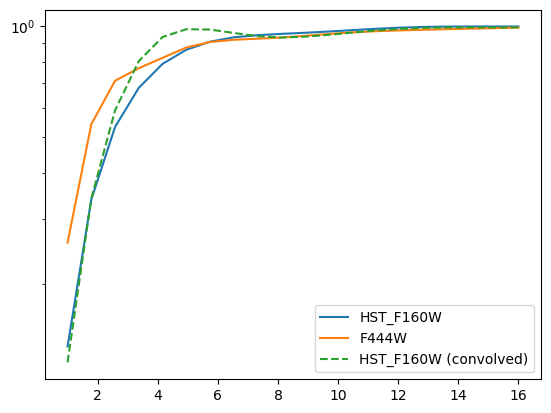

In [36]:
psf_type ='F444W'
for img_band, img_path in path_dic.items():
    if 'HST' in img_band:
        print('Now at', img_band)
        psf_ = PSF_homo(img_path, 0, img_band, psf_type='F444W')
        psf_.build_self_psf(mode='Gaia')
        psf_.build_target_psf()
        kernel = fits.getdata(f'/home/lupengjun/OII_emitter/photometry/output/psf_kernel_pypher/3X/kernel_{img_band}_to_{psf_type}.fits')
        kernel = zoom(kernel, 3)/9
        test_psfmatching(psf_.psf, psf_.target_psf, kernel, )
        if input('Type 99 to continue, else stop') != '99':
            break